In [167]:
import matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [168]:
def find_el(list, rnd):
    m = abs(list[0] - rnd)
    j = 0
    for i in range(1,len(list)):
        if abs(list[i] - rnd) < m:
            m = abs(list[i] - rnd)
            j = i
    return j

In [145]:
#this part helps in making gifs
def PLOT(x,y, hx,hy, N):
    font = {'family' : 'Segoe UI',
        'weight' : 'normal',
        'size'   : 18}
    matplotlib.rc('font', **font)
    
    plt.figure (figsize=(10,10))
    plt.plot(x, y, '-', color='#4cd87a')
    plt.plot(hx, hy)
    plt.xlabel('x') 
    plt.ylabel(r'P(x)')
    plt.xlim(0,5)
    plt.ylim(0.9,2.5)
    plt.title('N=%d'%N)
    plt.savefig("figure_%d.png"%N, dpi=300)
    return 0

In [192]:
y = []
x = []
for r in np.arange(2, 5,0.01):
    theta = 2*np.pi / (r**2)
    x.append(r*np.cos(theta))
    y.append(r*np.sin(theta))
Xmin, Xmax = np.min(x), np.max(x)
s_a = 0
for i in range(len(x)-1):
    s_a = s_a + (x[i+1]-x[i])*(y[i]+y[i+1])/2

hyy1 = []
hyy2 = []
hxx = []
for N in tqdm( [1000, 50000] ):
    data = [2.5]
    for i in range(N-1):
        d = (Xmax-Xmin)*np.random.rand()+Xmin
        alpha = y[find_el(x, d)] / y[find_el(x, data[-1])]
        if alpha >= 1: 
            data = data + [d]
        elif random.uniform(0,1) < alpha: 
            data = data + [d]
        else: 
            data = data + [data[-1]]

    hy, hx = np.histogram(data, bins=100) #hx has values of right and left values of bins
    s_s = 0
    for i in range(len(hy)):
        s_s = s_s + (hx[i+1]-hx[i])*hy[i]
    
    hx = (np.array(hx)[1:]+np.array(hx)[0:-1]) / 2 
    hy1 = np.array(hy)*s_a/s_s #normalization by spaces under curves
    
    mx1, mx2 = np.max(y), np.max(hy) # quick and dirty 'normalization'
    hy2 = np.array(hy)*mx1/mx2     
    hxx.append(hx)
    hyy1.append(hy1)
    hyy2.append(hy2)
    
#     PLOT(x,y, hx,hy, N)

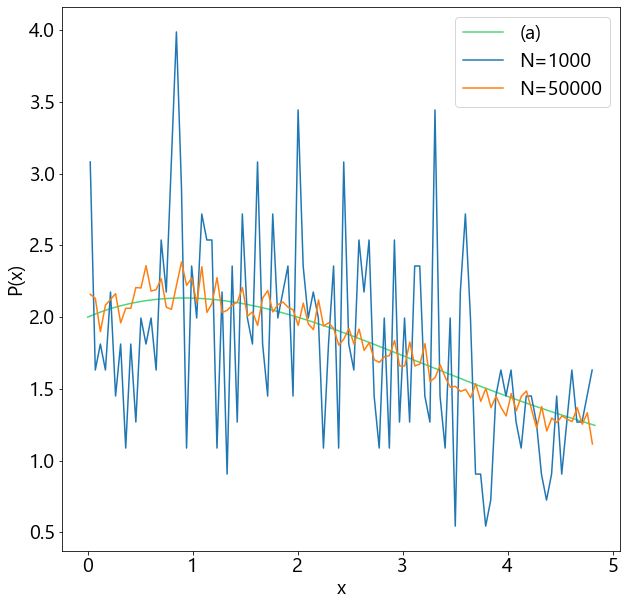

In [193]:
font = {'family' : 'Segoe UI',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
plt.figure (figsize=(10,10))
plt.plot(x, y, '-', color='#4cd87a', label = '(a)')

plt.plot(hxx[0], hyy1[0], label = 'N=1000')
plt.plot(hxx[1], hyy1[1], label = 'N=%d'%N)
plt.legend ()
plt.xlabel('x') 
plt.ylabel(r'P(x)')
plt.show()

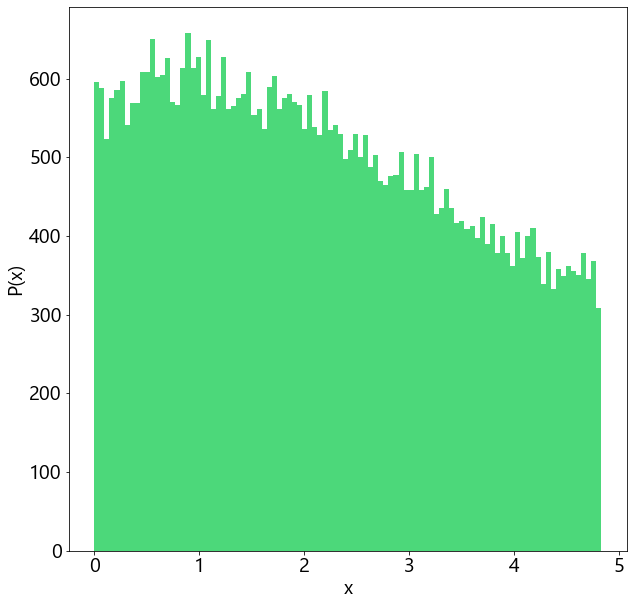

In [195]:
plt.figure (figsize=(10,10))
plt.hist(data, bins =100, color='#4cd87a')
plt.xlabel('x') 
plt.ylabel(r'P(x)')
plt.show()